In [1277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




In [1278]:
df = pd.read_csv('./Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [1279]:
df.drop('Serial No.',axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [1280]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [1281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [1282]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [1283]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [1284]:
df.groupby(by='University Rating').mean()


,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [1285]:
df.shape

(500, 8)

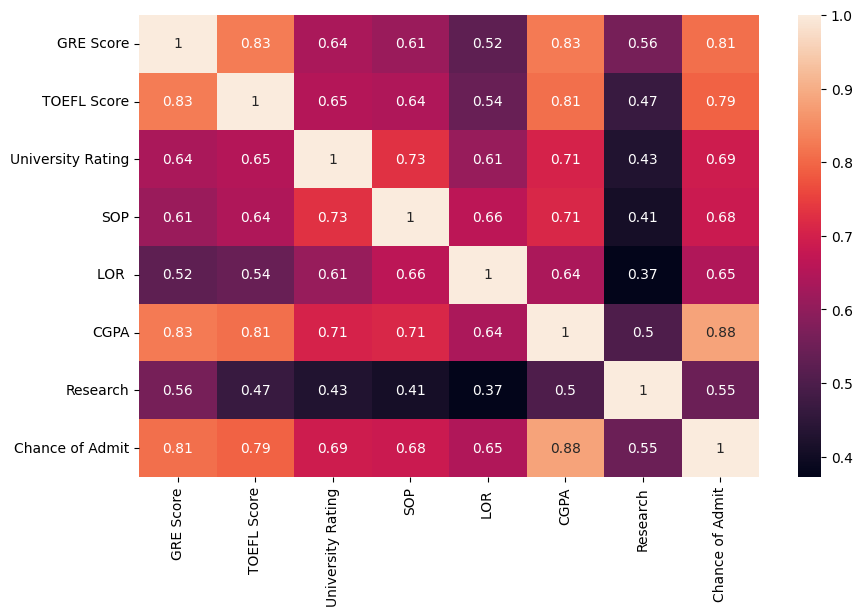

In [1286]:
plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [1287]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [1288]:
X = df.drop(columns=['Chance of Admit'],axis=1)
y = df['Chance of Admit']


In [1289]:
X.shape


(500, 7)

In [1290]:
xscaler = StandardScaler()

X = xscaler.fit_transform(X)

yscaler = StandardScaler()

y = yscaler.fit_transform(y.values.reshape(-1,1))




In [1291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [1292]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1293]:
model.score(X_test,y_test)

0.8207166983513674

In [1294]:
ann_model = keras.models.Sequential([
    Dense(50, input_shape=(7,), activation='relu'),
    Dense(150, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')
])

ann_model.compile(optimizer='adam', loss='mse')
ann_model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_209 (Dense)               │ (None, 50)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,251 (110.36 KB)

 Trainable params: 28,251 (110.36 KB)

 Non-trainable params: 0 (0.00 B)

In [1295]:
ann_model.compile(optimizer='adam', loss='mean_squared_error')

In [1296]:
epochs = ann_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7799
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3973 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3293 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2919 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2865 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2650 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2554 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2028 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2638 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2504 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2478 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2467 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2111 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2492 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [1297]:
result = ann_model.evaluate(X_test, y_test)

accuracy = 1 - result
print("Accuracy: ", (accuracy * 100.0))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2834 
Accuracy:  73.9852249622345


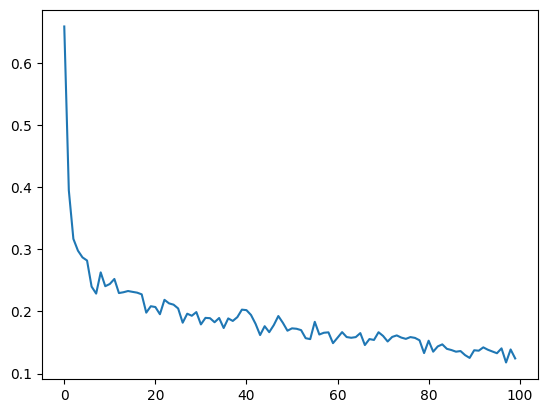

In [1298]:
plt.plot(epochs.history['loss'])
plt.show()

In [1299]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)


c:\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [1300]:

y_pred = randomforest.predict(X_test)

In [1301]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
print('Accuracy:', randomforest.score(X_test,y_test)*100)

Mean Absolute Error: 0.3019875442020465
Mean Squared Error: 0.2200869351870184
Root Mean Squared Error: 0.46913424004970944
R2 Score: 0.8058370141621517
Accuracy: 80.58370141621516


In [1302]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)


DecisionTreeRegressor()

In [1303]:

y_pred = dtree.predict(X_test)

In [1304]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
print('Accuracy:', dtree.score(X_test,y_test)*100)

Mean Absolute Error: 0.41513239988945805
Mean Squared Error: 0.40863603468444715
Root Mean Squared Error: 0.6392464584840867
R2 Score: 0.6394970353517345
Accuracy: 63.949703535173455
